<a href="https://colab.research.google.com/github/Jadrianp29/testreko/blob/main/DS_C3_SC1_JesusAdrianAguilarPerez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.

In [2]:
happiness = pd.read_csv('Happiness_report.csv')


A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice

In [30]:
mexico = happiness[happiness['Country or region'] == 'Mexico']
mexico.set_index('Country or region', inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

Text(0, 0.5, 'Frequency')

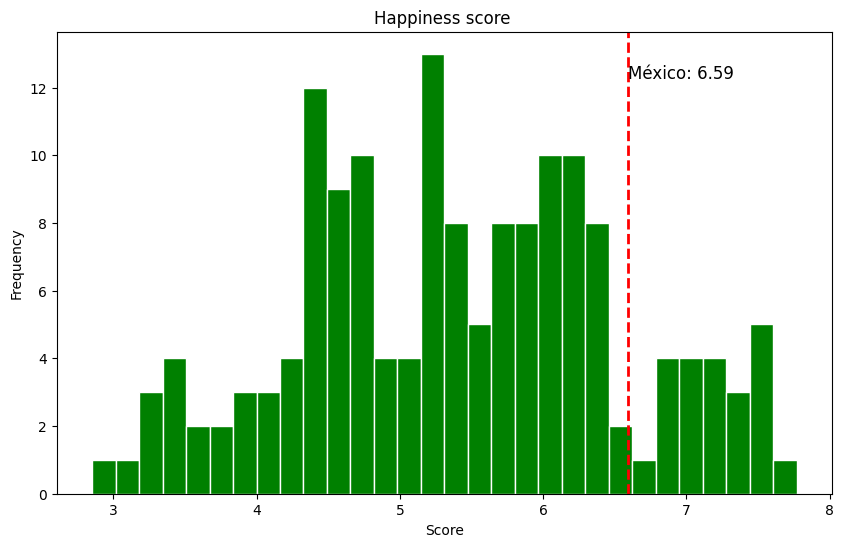

In [31]:
mexico = happiness[happiness['Country or region'] == 'Mexico']['Score'].values[0]
plt.figure(figsize=(10, 6))
plt.hist(happiness['Score'], bins=30, color='green', edgecolor='white')
plt.axvline(mexico, color='red', linestyle='dashed', linewidth=2)
plt.text(mexico, plt.ylim()[1] * 0.9, f'México: {mexico :.2f}', color='black', fontsize=12)
plt.title('Happiness score ')
plt.xlabel('Score')
plt.ylabel('Frequency')

Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

Text(0, 0.9584400000000001, 'México: 0.86')

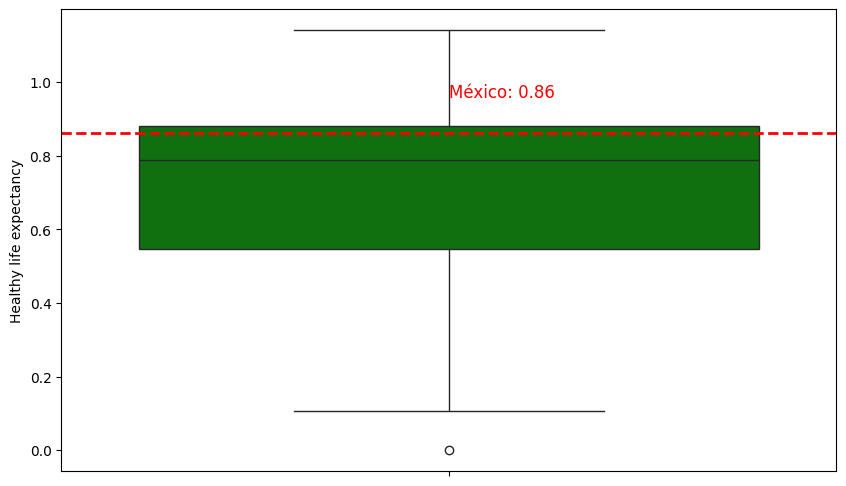

In [32]:
mexico_score = happiness[happiness['Country or region'] == 'Mexico']['Healthy life expectancy'].values[0]
plt.figure(figsize=(10, 6))
sns.boxplot(y=happiness['Healthy life expectancy'], color='green')
plt.axhline(mexico_score, color='red', linestyle='dashed', linewidth=2)
plt.text(0, plt.ylim()[1] * 0.8, f'México: {mexico_score :.2f}', color='red', fontsize=12)

Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.

In [33]:
mexico2 = mexico.drop(['Overall rank', 'Score'], axis=1)
plt.figure(figsize=(15, 8))
plt.pie(mexico2.iloc[0], labels=mexico2.columns, autopct='%1.1f%%')

AttributeError: 'numpy.float64' object has no attribute 'drop'

Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

<Axes: xlabel='Country or region'>

<Figure size 1500x800 with 0 Axes>

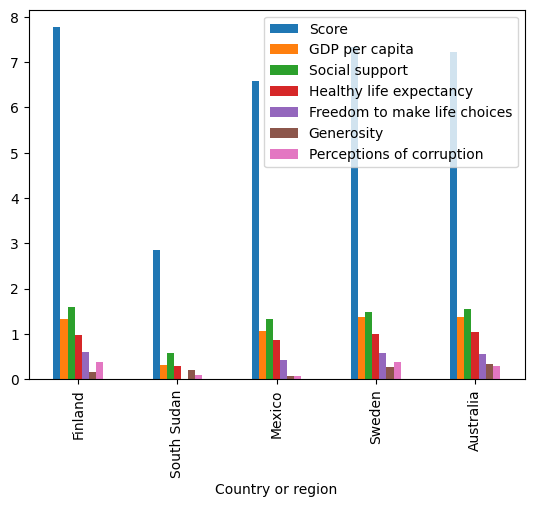

In [15]:
happiness2 = happiness.drop(['Overall rank'], axis=1)
happy = happiness2.loc[happiness['Score'].idxmax()]
least_happy = happiness2.loc[happiness['Score'].idxmin()]
mexico = happiness2[happiness2['Country or region'] == 'Mexico'].iloc[0]
Sweden = happiness2[happiness2['Country or region'] == 'Sweden'].iloc[0]
Australia = happiness2[happiness2['Country or region'] == 'Australia'].iloc[0]
countries = pd.concat([happy, least_happy, mexico, Sweden, Australia], axis=1).T
countries.set_index('Country or region', inplace=True)
plt.figure(figsize=(15, 8))
countries.plot(kind='bar')


Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

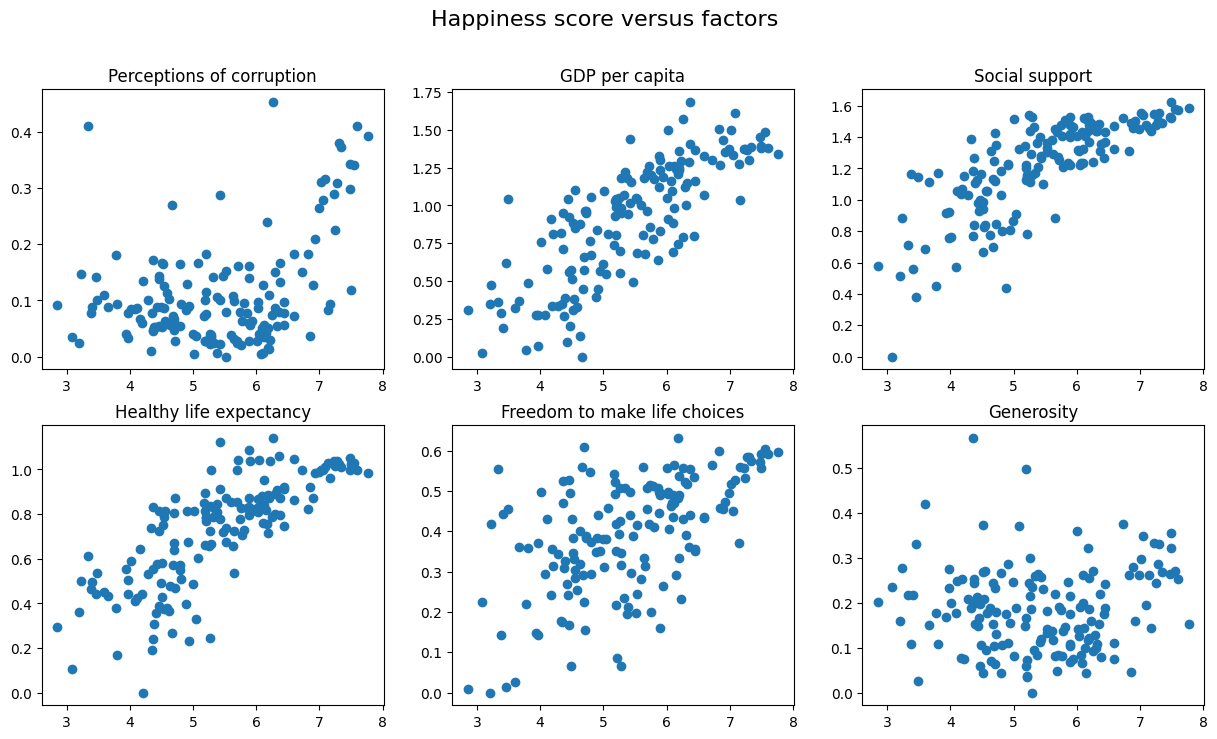

In [17]:
fig,axs = plt.subplots(2,3,figsize=(15, 8))
axs[0,0].scatter(happiness['Score'],happiness['Perceptions of corruption'])
axs[0,1].scatter(happiness['Score'],happiness['GDP per capita'])
axs[0,2].scatter(happiness['Score'],happiness['Social support'])
axs[1,0].scatter(happiness['Score'],happiness['Healthy life expectancy'])
axs[1,1].scatter(happiness['Score'],happiness['Freedom to make life choices'])
axs[1,2].scatter(happiness['Score'],happiness['Generosity'])
axs[0,0].set_title('Perceptions of corruption')
axs[0,1].set_title('GDP per capita')
axs[0,2].set_title('Social support')
axs[1,0].set_title('Healthy life expectancy')
axs[1,1].set_title('Freedom to make life choices')
axs[1,2].set_title('Generosity')
fig.suptitle('Happiness score versus factors', fontsize=16)
plt.show()


Heatmap

Text(0.5, 1.0, 'Correlation heatmap')

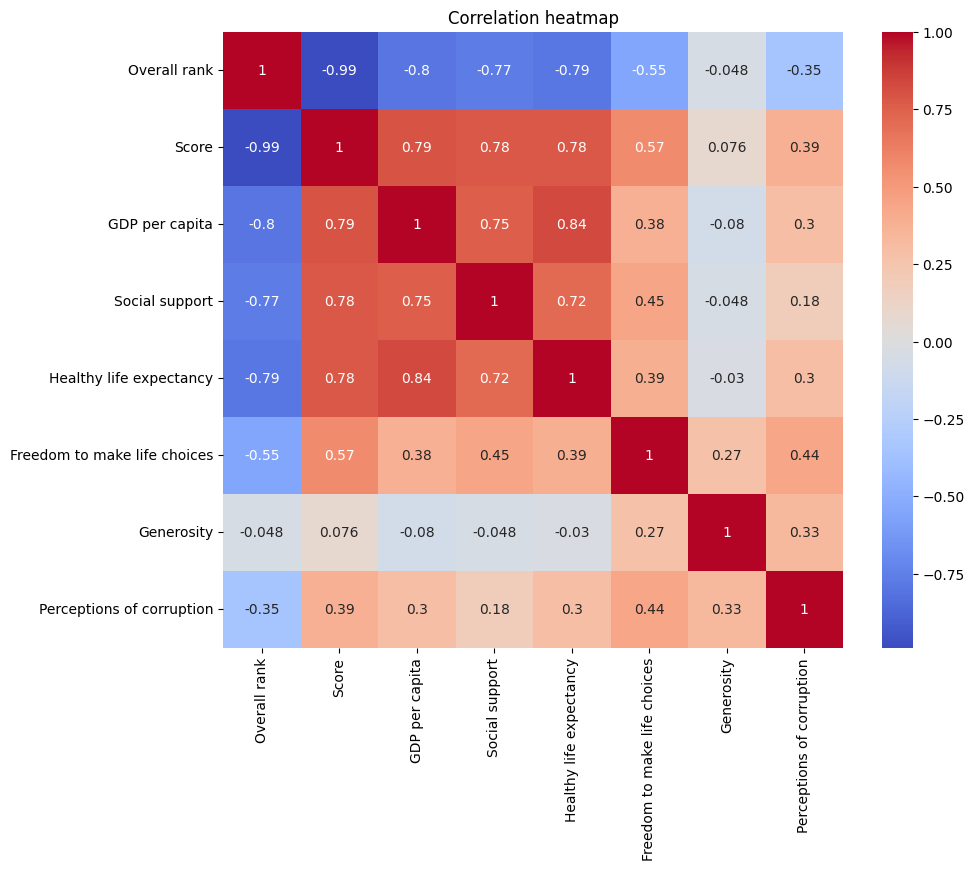

In [48]:
heatmap_data = happiness.drop([ 'Country or region'], axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')

Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

In [18]:
metadata = pd.read_csv('metadata.csv')


In [19]:
metadata_happiness = happiness.merge(metadata, left_on='Country or region', right_on='TableName')
metadata_happiness


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FIN,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Finland
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DNK,Europe & Central Asia,High income,NaN,Denmark
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NOR,Europe & Central Asia,High income,NaN,Norway
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,ISL,Europe & Central Asia,High income,NaN,Iceland
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NLD,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,RWA,Sub-Saharan Africa,Low income,NaN,Rwanda
132,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,TZA,Sub-Saharan Africa,Lower middle income,NaN,Tanzania
133,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,AFG,South Asia,Low income,NaN,Afghanistan
134,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,CAF,Sub-Saharan Africa,Low income,NaN,Central African Republic


Text(0, 0.5, 'Happiness score')

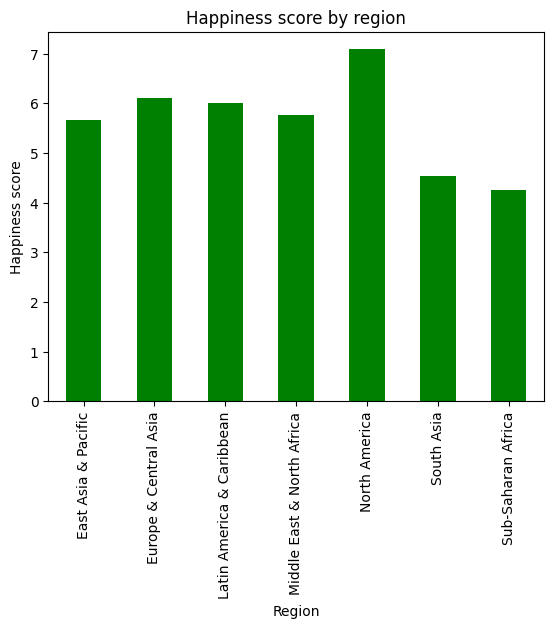

In [20]:
metadata_happiness.groupby('Region')['Score'].mean().plot(kind='bar',color='green')
plt.title('Happiness score by region')
plt.xlabel('Region')
plt.ylabel('Happiness score')